# Deep Learning for Image Classification Assessment

Assessment Implemented by: Herb Guzman
November 2019

## Problem Statement

The task consisted of building a Convolutional Neural Network, CNN with Keras 2.2 (TensorFlow) for classifying fashion images.
The images are from the MNIST fashion dataset.  This dataset consists of 10 labels of grayscale images of various types of clothing items.
The dataset includes 60,000 training images and 10,000 test images, all of these are 28x28 pixels in size.

The 10 labels are as follows:
    
    Label   Description
    
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

In [1]:
# Task # 1 - Download the dataset using Keras

from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


In [3]:
# Task # 2 - Visualize the data
# Load relevant library for handling image viewing
# View any one of the images

import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# Check the size of the training dataset
x_train.shape

(60000, 28, 28)

In [11]:
# Check the size of the test dataset
x_test.shape

(10000, 28, 28)

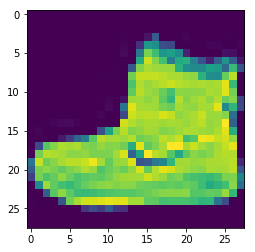

In [12]:
# Look at the first image (low-res, 28x28)
plt.imshow(x_train[0])

In [13]:
# Assign the first image in the training set to a temporary variable
# for visualization
train_img1=x_train[0]

In [14]:
# Check the size of the single image
train_img1.shape

(28, 28)

In [15]:
# Check the peak color scale value for this image
train_img1.max()

255

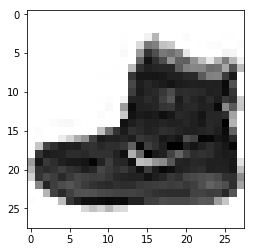

In [43]:
# Check the image with a grayscale colormap
plt.imshow(train_img1,cmap='gray_r')

In [17]:
# Task #3 Training Data pre-processing: normalization, reshape and conversion to one-hot encoding
# Normalize
x_train = x_train/255
x_test = x_test/255

In [18]:
# Assign the re-shaped dataset to the array x_train
# The reshaped array has one more dimension
# This will allow using one-hot encoding
x_train = x_train.reshape(60000,28,28,1)

In [19]:
# Check the size of the new array
x_train.shape

(60000, 28, 28, 1)

In [20]:
# Repeat the re-shape for the test dataset
x_test = x_test.reshape(10000,28,28,1)

In [21]:
# Check the size of the new array
x_test.shape

(10000, 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [25]:
# Inspect the labels of the training dataset (the y-data) to make sure the
# one-hot encoding worked
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [26]:
# Convert to one-hot encoded
# First import the Keras Utitiles library and assign it to the 
# the variable: "to_categorical"
# This will be used for the one-hot encoding conversion
from keras.utils import to_categorical

In [27]:
# As mentioned at the beginning, there are 10 labels/categories
# One-hot encoding conversion here:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [28]:
# Check the training dataset structure
y_cat_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [29]:
# Check the test dataset structure
y_cat_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [30]:
# Finally, check that the y-test data labels are also
# in one-hot encoding order
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [31]:
# Task #5
# MODEL DEVELOPMENT
# Import the pertinent keras libraries needed to build a neural network
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [32]:
# CONSTRUCT THE MODEL
Herbs_DL_AssessmentModel = Sequential()

# EXPERIMENT WITH 2 CONVOLUTION LAYERS
# 32 Filters, 4x4 kernel size, inputs: 28x28, grayscale, Rectified Linear Unit (ReLU) activation function
Herbs_DL_AssessmentModel.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
Herbs_DL_AssessmentModel.add(MaxPool2D(pool_size=(2,2)))

# FLATTEN:
Herbs_DL_AssessmentModel.add(Flatten())
                     
# DENSE LAYER
# Use 128 neurons
Herbs_DL_AssessmentModel.add(Dense(128,activation='relu'))
                     
# LAST LAYER - DENSE - CLASSIFIER
# Use softmax activation function for the output layer
Herbs_DL_AssessmentModel.add(Dense(10,activation='softmax'))
                     
# Compile the model with the following parameters:
# loss-function: categorical-crossentropy
# optimizer: rmsprop
# metrics: accuracy 
Herbs_DL_AssessmentModel.compile(loss='categorical_crossentropy',
                         optimizer='rmsprop',
                         metrics=['accuracy'])

In [33]:
# Check the model structure
Herbs_DL_AssessmentModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Re-check

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Task #6 TRAINING
# Train Herb's Model, use 10 epochs for this example
# use the x_train_set to train (fit) the model
Herbs_DL_AssessmentModel.fit(x_train,y_cat_train,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 26s 440us/step - loss: 0.3997 - acc: 0.8577
Epoch 2/10
60000/60000 [==============================] - 26s 440us/step - loss: 0.2768 - acc: 0.9008
Epoch 3/10
60000/60000 [==============================] - 30s 503us/step - loss: 0.2395 - acc: 0.9141
Epoch 4/10
60000/60000 [==============================] - 30s 493us/step - loss: 0.2146 - acc: 0.9219
Epoch 5/10
60000/60000 [==============================] - 29s 480us/step - loss: 0.1969 - acc: 0.9295
Epoch 6/10
60000/60000 [==============================] - 28s 464us/step - loss: 0.1838 - acc: 0.9350
Epoch 7/10
60000/60000 [==============================] - 28s 469us/step - loss: 0.1730 - acc: 0.9385
Epoch 8/10
60000/60000 [==============================] - 28s 473us/step - loss: 0.1653 - acc: 0.9422
Epoch 9/10
60000/60000 [==============================] - 28s 473us/step - loss: 0.1565 - acc: 0.9455
Epoch 10/10
60000/60000 [==============================] - 28s 474us/step - loss: 

In [36]:
# Task #7 - TESTING
# Now the the model is trained, check the metrics names
# Also save the weights
# Do all this before testing
Herbs_DL_AssessmentModel.metrics_names

['loss', 'acc']

In [37]:
# Save the model weights and other parameters
Herbs_DL_AssessmentModel.save('Herbs_DL_AssessmentModel_10Epochs.h5')

In [38]:
# Test the model with the weights determined during training
Herbs_DL_AssessmentModel.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 2s 186us/step


[0.37934122207164767, 0.8977]

In [39]:
# Import classification metrics libraries from Scikit Learn (sklearn)
from sklearn.metrics import classification_report

In [40]:
# The predictions will NOT be One-Hot Encoded
# So, we will need to use the original y_test data (not econded)
# for the actual prediction/testing
Herbs_Model_predictions = Herbs_DL_AssessmentModel.predict_classes(x_test)

In [41]:
# Recall that the answer to predictions is already known
# in the original y_test dataset
y_cat_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [42]:
# Lastly, print the results of the testing
# Note that the f1-score averages in the 90's
# as do the precision and recall
# Using precision, recall and f1-scode is a common
# method of evaluation and was the method used in the course
print(classification_report(y_test,Herbs_Model_predictions))

             precision    recall  f1-score   support

          0       0.84      0.86      0.85      1000
          1       1.00      0.97      0.98      1000
          2       0.75      0.90      0.82      1000
          3       0.90      0.92      0.91      1000
          4       0.90      0.73      0.81      1000
          5       0.97      0.97      0.97      1000
          6       0.75      0.73      0.74      1000
          7       0.94      0.97      0.96      1000
          8       0.99      0.97      0.98      1000
          9       0.97      0.95      0.96      1000

avg / total       0.90      0.90      0.90     10000



In [ ]:
# DONE